In [2]:
import numpy as np
import pandas as pd

import unicodedata, re, string
import nltk

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
import os


In [3]:
df = pd.read_csv("opinions.tsv", sep="\t")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   1                                        6917 non-null   int64 
 1   The Da Vinci Code book is just awesome.  6917 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [5]:
df.describe()

,1
count,6917.000000
mean,0.569900
std,0.495126
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
df.head()

,1,The Da Vinci Code book is just awesome.
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


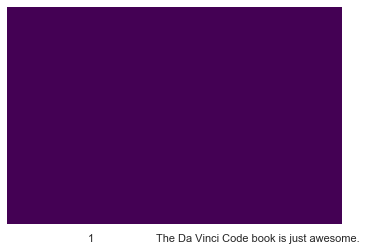

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
df = df.rename(columns = {'1':'Rating', 'The Da Vinci Code book is just awesome.' : 'Phrases'})

In [9]:
df.head()

,Rating,Phrases
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


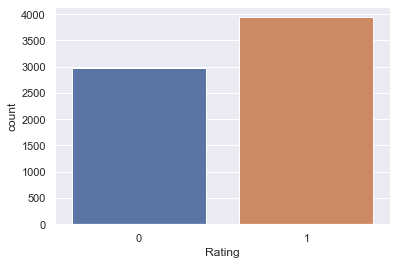

In [10]:
sns.countplot(x="Rating", data = df)

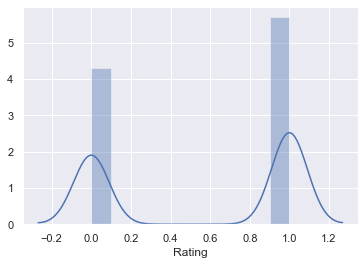

In [11]:
sns.distplot(df['Rating'])

In [12]:
print(df.shape)

(6917, 2)


In [13]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
#    words = remove_stopwords(words)
    return words


In [14]:
df.head()

,Rating,Phrases
0,1,this was the first clive cussler i've ever rea...
1,1,i liked the Da Vinci Code a lot.
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


In [16]:
# First step - tokenizing phrases
df['Words'] = df['Phrases'].apply(nltk.word_tokenize)

# Second step - passing through prep functions
df['Words'] = df['Words'].apply(normalize) 
df['Words'].head()

0    [this, was, the, first, clive, cussler, i, ve,...
1             [i, liked, the, da, vinci, code, a, lot]
2             [i, liked, the, da, vinci, code, a, lot]
3    [i, liked, the, da, vinci, code, but, it, ulti...
4    [that, s, not, even, an, exaggeration, and, at...
Name: Words, dtype: object

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rusal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df

,Rating,Phrases,Words
0,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, ve,..."
1,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]"
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]"
3,1,I liked the Da Vinci Code but it ultimatly did...,"[i, liked, the, da, vinci, code, but, it, ulti..."
4,1,that's not even an exaggeration ) and at midni...,"[that, s, not, even, an, exaggeration, and, at..."
...,...,...,...
6912,0,Brokeback Mountain was boring.,"[brokeback, mountain, was, boring]"
6913,0,So Brokeback Mountain was really depressing.,"[so, brokeback, mountain, was, really, depress..."
6914,0,"As I sit here, watching the MTV Movie Awards, ...","[as, i, sit, here, watching, the, mtv, movie, ..."
6915,0,Ok brokeback mountain is such a horrible movie.,"[ok, brokeback, mountain, is, such, a, horribl..."


In [19]:
# Third step - creating a list of unique words to be used as dictionary for encoding
word_set = set()
for l in df['Words']:
    for e in l:
        word_set.add(e)
        
word_to_int = {word: ii for ii, word in enumerate(word_set, 1)}

# Check if they are still the same lenght
print(len(word_set))
print(len(word_to_int))

2165
2165


In [20]:
# Now the dict to tokenize each phrase
df['Tokens'] = df['Words'].apply(lambda l: [word_to_int[word] for word in l])
df['Tokens'].head()

0    [1107, 1874, 259, 41, 805, 243, 1796, 904, 129...
1        [1796, 1180, 259, 936, 2044, 211, 2074, 2127]
2        [1796, 1180, 259, 936, 2044, 211, 2074, 2127]
3    [1796, 1180, 259, 936, 2044, 211, 866, 1253, 2...
4    [1333, 1867, 1870, 1295, 548, 1316, 1525, 1778...
Name: Tokens, dtype: object

In [21]:
df

,Rating,Phrases,Words,Tokens
0,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, ve,...","[1107, 1874, 259, 41, 805, 243, 1796, 904, 129..."
1,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]","[1796, 1180, 259, 936, 2044, 211, 2074, 2127]"
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]","[1796, 1180, 259, 936, 2044, 211, 2074, 2127]"
3,1,I liked the Da Vinci Code but it ultimatly did...,"[i, liked, the, da, vinci, code, but, it, ulti...","[1796, 1180, 259, 936, 2044, 211, 866, 1253, 2..."
4,1,that's not even an exaggeration ) and at midni...,"[that, s, not, even, an, exaggeration, and, at...","[1333, 1867, 1870, 1295, 548, 1316, 1525, 1778..."
...,...,...,...,...
6912,0,Brokeback Mountain was boring.,"[brokeback, mountain, was, boring]","[677, 1196, 1874, 1130]"
6913,0,So Brokeback Mountain was really depressing.,"[so, brokeback, mountain, was, really, depress...","[1647, 677, 1196, 1874, 445, 865]"
6914,0,"As I sit here, watching the MTV Movie Awards, ...","[as, i, sit, here, watching, the, mtv, movie, ...","[1922, 1796, 1880, 1045, 1168, 259, 864, 1286,..."
6915,0,Ok brokeback mountain is such a horrible movie.,"[ok, brokeback, mountain, is, such, a, horribl...","[1592, 677, 1196, 222, 535, 2074, 1380, 1286]"


In [22]:
# Step four - get the len of longest phrase
max_len = df['Tokens'].str.len().max()
print(max_len)

873


In [23]:
df

,Rating,Phrases,Words,Tokens
0,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, ve,...","[1107, 1874, 259, 41, 805, 243, 1796, 904, 129..."
1,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]","[1796, 1180, 259, 936, 2044, 211, 2074, 2127]"
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]","[1796, 1180, 259, 936, 2044, 211, 2074, 2127]"
3,1,I liked the Da Vinci Code but it ultimatly did...,"[i, liked, the, da, vinci, code, but, it, ulti...","[1796, 1180, 259, 936, 2044, 211, 866, 1253, 2..."
4,1,that's not even an exaggeration ) and at midni...,"[that, s, not, even, an, exaggeration, and, at...","[1333, 1867, 1870, 1295, 548, 1316, 1525, 1778..."
...,...,...,...,...
6912,0,Brokeback Mountain was boring.,"[brokeback, mountain, was, boring]","[677, 1196, 1874, 1130]"
6913,0,So Brokeback Mountain was really depressing.,"[so, brokeback, mountain, was, really, depress...","[1647, 677, 1196, 1874, 445, 865]"
6914,0,"As I sit here, watching the MTV Movie Awards, ...","[as, i, sit, here, watching, the, mtv, movie, ...","[1922, 1796, 1880, 1045, 1168, 259, 864, 1286,..."
6915,0,Ok brokeback mountain is such a horrible movie.,"[ok, brokeback, mountain, is, such, a, horribl...","[1592, 677, 1196, 222, 535, 2074, 1380, 1286]"


In [24]:
# Pad each phrase representation with zeroes, starting from the beginning of sequence
# Will use a combined list of phrases as np array for further work. 

all_tokens = np.array([t for t in df['Tokens']])
encoded_labels = np.array([l for l in df['Rating']])

# Create blank rows
features = np.zeros((len(all_tokens), max_len), dtype=int)
# for each phrase, add zeros at the end 
for i, row in enumerate(all_tokens):
    features[i, :len(row)] = row

#print first 3 values of the feature matrix 
print(features[:3])

[[1107 1874  259 ...    0    0    0]
 [1796 1180  259 ...    0    0    0]
 [1796 1180  259 ...    0    0    0]]


In [25]:
df

,Rating,Phrases,Words,Tokens
0,1,this was the first clive cussler i've ever rea...,"[this, was, the, first, clive, cussler, i, ve,...","[1107, 1874, 259, 41, 805, 243, 1796, 904, 129..."
1,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]","[1796, 1180, 259, 936, 2044, 211, 2074, 2127]"
2,1,i liked the Da Vinci Code a lot.,"[i, liked, the, da, vinci, code, a, lot]","[1796, 1180, 259, 936, 2044, 211, 2074, 2127]"
3,1,I liked the Da Vinci Code but it ultimatly did...,"[i, liked, the, da, vinci, code, but, it, ulti...","[1796, 1180, 259, 936, 2044, 211, 866, 1253, 2..."
4,1,that's not even an exaggeration ) and at midni...,"[that, s, not, even, an, exaggeration, and, at...","[1333, 1867, 1870, 1295, 548, 1316, 1525, 1778..."
...,...,...,...,...
6912,0,Brokeback Mountain was boring.,"[brokeback, mountain, was, boring]","[677, 1196, 1874, 1130]"
6913,0,So Brokeback Mountain was really depressing.,"[so, brokeback, mountain, was, really, depress...","[1647, 677, 1196, 1874, 445, 865]"
6914,0,"As I sit here, watching the MTV Movie Awards, ...","[as, i, sit, here, watching, the, mtv, movie, ...","[1922, 1796, 1880, 1045, 1168, 259, 864, 1286,..."
6915,0,Ok brokeback mountain is such a horrible movie.,"[ok, brokeback, mountain, is, such, a, horribl...","[1592, 677, 1196, 222, 535, 2074, 1380, 1286]"


In [26]:
df = df.sample(frac=1)

In [27]:
df

,Rating,Phrases,Words,Tokens
3244,1,"He's like,'YEAH I GOT ACNE AND I LOVE BROKEBAC...","[he, s, like, yeah, i, got, acne, and, i, love...","[887, 1867, 888, 735, 1796, 745, 742, 1525, 17..."
507,1,The Da Vinci Code is awesome!!,"[the, da, vinci, code, is, awesome]","[259, 936, 2044, 211, 222, 1480]"
5046,0,"My point is, Harry Potter is evil...","[my, point, is, harry, potter, is, evil]","[1893, 1551, 222, 1984, 1017, 222, 288]"
294,1,DA VINCI CODE IS AWESOME!!,"[da, vinci, code, is, awesome]","[936, 2044, 211, 222, 1480]"
4142,0,i heard da vinci code sucked soo much only 2.5...,"[i, heard, da, vinci, code, sucked, soo, much,...","[1796, 2075, 936, 2044, 211, 1849, 1498, 1234,..."
...,...,...,...,...
4586,0,Combining the opinion / review from Gary and G...,"[combining, the, opinion, review, from, gary, ...","[1590, 259, 121, 1638, 1862, 2, 1525, 1755, 10..."
6759,0,", she helped me bobbypin my insanely cool hat ...","[she, helped, me, bobbypin, my, insanely, cool...","[241, 2125, 1882, 79, 1893, 1603, 1277, 334, 2..."
4940,0,I hate playing Mission Impossible --- love 007..,"[i, hate, playing, mission, impossible, love]","[1796, 1597, 491, 1985, 1991, 2135]"
1250,1,I like Mission Impossible movies because you n...,"[i, like, mission, impossible, movies, because...","[1796, 888, 1985, 1991, 207, 1785, 1512, 449, ..."


In [28]:

all_tokens = np.array([t for t in df['Tokens']])
encoded_labels = np.array([l for l in df['Rating']])

In [29]:
# Create blank rows
features = np.zeros((len(all_tokens), max_len), dtype=int)
# for each phrase, add zeros at the end 
for i, row in enumerate(all_tokens):
    features[i, :len(row)] = row


In [30]:
features

array([[ 887, 1867,  888, ...,    0,    0,    0],
       [ 259,  936, 2044, ...,    0,    0,    0],
       [1893, 1551,  222, ...,    0,    0,    0],
       ...,
       [1796, 1597,  491, ...,    0,    0,    0],
       [1796,  888, 1985, ...,    0,    0,    0],
       [ 259,  936, 2044, ...,    0,    0,    0]])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = features
y = encoded_labels
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC()

In [35]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
X_test

array([[1796,  745, 2074, ...,    0,    0,    0],
       [1659, 1850,  588, ...,    0,    0,    0],
       [1796,  888, 1985, ...,    0,    0,    0],
       ...,
       [ 866, 1796, 1597, ...,    0,    0,    0],
       [ 677, 1196,  222, ...,    0,    0,    0],
       [1796, 1597, 1984, ...,    0,    0,    0]])

In [37]:
predictions = model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,predictions))

[[ 744  167]
 [ 114 1051]]


In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       911
           1       0.86      0.90      0.88      1165

    accuracy                           0.86      2076
   macro avg       0.87      0.86      0.86      2076
weighted avg       0.86      0.86      0.86      2076

